In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import ta

In [52]:
data = pd.read_csv("D:\SierraChart\Data\ESM24_FUT_CME [CBV][M]  1500 Volume #4_GraphData.txt")

In [54]:
data.head()

,Date,Time,Open,High,Low,Last,Volume,NumTrades,OHLC Avg,HLC Avg,...,Line1,Line2,Line3,Line4,Line5,Line6,Line7,Line8,Line9,TR
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-01 18:00:00.000000,2024-5-1,18:00:00.000000,5057.00,5060.00,5056.50,5057.69,1500,1070,5057.80,5058.06,...,2500,-2500,5000,-5000,20000,-20000,0,10000,-10000,1.0
2024-05-01 18:01:34.718000,2024-5-1,18:01:34.718000,5057.34,5059.75,5056.25,5058.06,1500,1057,5057.85,5058.02,...,2500,-2500,5000,-5000,20000,-20000,0,10000,-10000,1.0
2024-05-01 18:05:31.034000,2024-5-1,18:05:31.034000,5057.70,5062.00,5057.70,5060.06,1500,1139,5059.37,5059.92,...,2500,-2500,5000,-5000,20000,-20000,0,10000,-10000,1.0
2024-05-01 18:09:41.725013,2024-5-1,18:09:41.725013,5058.88,5060.25,5057.75,5059.56,1500,1006,5059.11,5059.19,...,2500,-2500,5000,-5000,20000,-20000,0,10000,-10000,1.0
2024-05-01 18:16:29.471009,2024-5-1,18:16:29.471009,5059.22,5060.50,5058.00,5059.44,1500,955,5059.29,5059.31,...,2500,-2500,5000,-5000,20000,-20000,0,10000,-10000,1.0


In [63]:

# Konwersja kolumn Date i Time na datetime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data[' Time'].str.strip())
data.set_index('Datetime', inplace=True)

# Przygotowanie danych do wykresu świecowego
ohlc_data = data[[' Open', ' High', ' Low', ' Last']].rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Last': 'Close'})

# Przygotowanie danych do VWAP i jego bandów
vwap = data[' Volume Weighted Average Price']
top_band_2 = data[' Top Band 2 of Vwap Standard Deviation']
bottom_band_2 = data[' Bottom Band 2 of Vwap Standard Deviation']
top_band_3 = data[' Top Band 3 of Vwap Standard Deviation']
bottom_band_3 = data[' Bottom Band 3 of Vwap Standard Deviation']

D:\python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


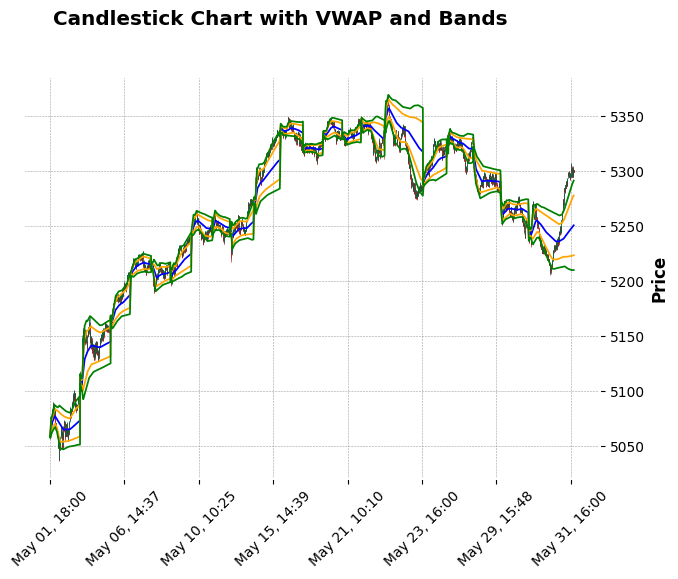

In [57]:
# Konwersja VWAP i bandów do odpowiedniego formatu dla mplfinance
addplots = [mpf.make_addplot(vwap, color='blue', linestyle='-'),
            mpf.make_addplot(top_band_2, color='orange', linestyle='-'),
            mpf.make_addplot(bottom_band_2, color='orange', linestyle='-'),
            mpf.make_addplot(top_band_3, color='green', linestyle='-'),
            mpf.make_addplot(bottom_band_3, color='green', linestyle='-')]

# Rysowanie wykresu
mpf.plot(ohlc_data, type='candle', addplot=addplots, style='charles', title='Candlestick Chart with VWAP and Bands', ylabel='Price')


In [49]:
selected_date = '2024-05-31'
filtered_data = data[data.index.date == pd.to_datetime(selected_date).date()]

ohlc_data = filtered_data[[' Open', ' High', ' Low', ' Last', ' Volume']].rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Last': 'Close'})

vwap = filtered_data[' Volume Weighted Average Price']
top_band_2 = filtered_data[' Top Band 2 of Vwap Standard Deviation']
bottom_band_2 = filtered_data[' Bottom Band 2 of Vwap Standard Deviation']
top_band_3 = filtered_data[' Top Band 3 of Vwap Standard Deviation']
bottom_band_3 = filtered_data[' Bottom Band 3 of Vwap Standard Deviation']

D:\python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


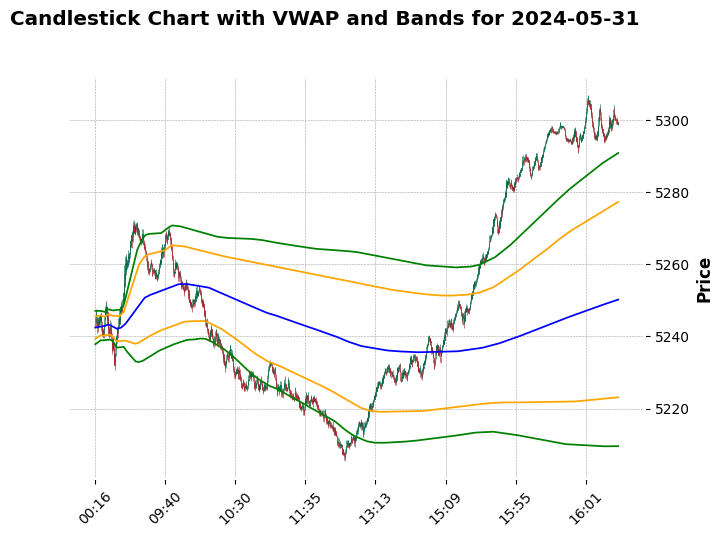

In [55]:
if len(ohlc_data) == len(vwap) == len(top_band_2) == len(bottom_band_2) == len(top_band_3) == len(bottom_band_3):
    # Konwersja VWAP i bandów do odpowiedniego formatu dla mplfinance
    addplots = [mpf.make_addplot(vwap, color='blue', linestyle='-'),
                mpf.make_addplot(top_band_2, color='orange', linestyle='-'),
                mpf.make_addplot(bottom_band_2, color='orange', linestyle='-'),
                mpf.make_addplot(top_band_3, color='green', linestyle='-'),
                mpf.make_addplot(bottom_band_3, color='green', linestyle='-')]

    # Rysowanie wykresu
    mpf.plot(ohlc_data, type='candle', addplot=addplots, style='charles', title='Candlestick Chart with VWAP and Bands for ' + selected_date, ylabel='Price')
else:
    print("Długości danych nie są zgodne.")

In [70]:
class TradingBot:
    def __init__(self, data, initial_balance=10000):
        self.data = data
        self.balance = initial_balance
        self.position = 0  # Pozycja (liczba akcji)
        self.trade_history = []
        self.entry_price = 0  # Cena wejścia do pozycji

    def buy(self, price, amount):
        self.position += amount
        self.balance -= price * amount
        self.entry_price = price
        self.trade_history.append({'action': 'buy', 'price': price, 'amount': amount, 'balance': self.balance})
        print(f'BUY: price={price}, amount={amount}, balance={self.balance}')

    def sell(self, price, amount):
        self.position -= amount
        self.balance += price * amount
        self.trade_history.append({'action': 'sell', 'price': price, 'amount': amount, 'balance': self.balance})
        print(f'SELL: price={price}, amount={amount}, balance={self.balance}')

    def run(self):
        for index, row in self.data.iterrows():
            if self.position == 0:
                if row['Close'] <= row['Bottom Band 2']:
                    self.buy(row['Close'], 1)
            elif self.position > 0:
                # Warunki sprzedaży: Cena >= Top Band 2 lub Cena >= VWAP lub stop loss na -2%
                if row['Close'] >= row['Top Band 2'] or row['Close'] >= row['VWAP'] or row['Close'] <= self.entry_price * 0.98:
                    self.sell(row['Close'], self.position)
                    
        self.final_balance()

    def final_balance(self):
        if self.position > 0:
            self.sell(self.data.iloc[-1]['Close'], self.position)
        print(f'Final balance: {self.balance}')
        for trade in self.trade_history:
            print(trade)

# Tworzenie instancji bota i uruchomienie strategii
bot = TradingBot(data)
bot.run()


BUY: price=5075.81, amount=1, balance=4924.19
SELL: price=5064.94, amount=1, balance=9989.13
BUY: price=5064.25, amount=1, balance=4924.879999999999
SELL: price=5066.19, amount=1, balance=9991.07
BUY: price=5064.5, amount=1, balance=4926.57
SELL: price=5065.81, amount=1, balance=9992.380000000001
BUY: price=5064.0, amount=1, balance=4928.380000000001
SELL: price=5064.75, amount=1, balance=9993.130000000001
BUY: price=5064.06, amount=1, balance=4929.070000000001
SELL: price=5064.5, amount=1, balance=9993.57
BUY: price=5063.5, amount=1, balance=4930.07
SELL: price=5064.88, amount=1, balance=9994.95
BUY: price=5063.75, amount=1, balance=4931.200000000001
SELL: price=5064.69, amount=1, balance=9995.89
BUY: price=5106.25, amount=1, balance=4889.639999999999
SELL: price=5106.69, amount=1, balance=9996.329999999998
BUY: price=5140.69, amount=1, balance=4855.6399999999985
SELL: price=5141.19, amount=1, balance=9996.829999999998
BUY: price=5139.81, amount=1, balance=4857.019999999998
SELL: pric

In [65]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data[' Time'].str.strip())
data.set_index('Datetime', inplace=True)

# Przemianowanie kolumn dla łatwiejszego dostępu
data.rename(columns={
    ' Open': 'Open', 
    ' High': 'High', 
    ' Low': 'Low', 
    ' Last': 'Close', 
    ' Volume': 'Volume',
    ' Top Band 2 of Vwap Standard Deviation': 'Top Band 2',
    ' Bottom Band 2 of Vwap Standard Deviation': 'Bottom Band 2',
    ' Top Band 3 of Vwap Standard Deviation': 'Top Band 3',
    ' Bottom Band 3 of Vwap Standard Deviation': 'Bottom Band 3',
    ' Volume Weighted Average Price': 'VWAP'
}, inplace=True)

# Obliczanie dodatkowych wskaźników
data['VWAP_std'] = data['VWAP'].rolling(window=20).std()
data['Top Band 2'] = data['VWAP'] + 2 * data['VWAP_std']
data['Bottom Band 2'] = data['VWAP'] - 2 * data['VWAP_std']
data['Top Band 3'] = data['VWAP'] + 3 * data['VWAP_std']
data['Bottom Band 3'] = data['VWAP'] - 3 * data['VWAP_std']

In [69]:
for trade in bot.trade_history:
    print(trade)


{'action': 'buy', 'price': 5075.81, 'amount': 1, 'balance': 4924.19}
{'action': 'sell', 'price': 5064.94, 'amount': 1, 'balance': 9989.13}
{'action': 'buy', 'price': 5064.25, 'amount': 1, 'balance': 4924.879999999999}
{'action': 'sell', 'price': 5066.19, 'amount': 1, 'balance': 9991.07}
{'action': 'buy', 'price': 5064.5, 'amount': 1, 'balance': 4926.57}
{'action': 'sell', 'price': 5065.81, 'amount': 1, 'balance': 9992.380000000001}
{'action': 'buy', 'price': 5064.0, 'amount': 1, 'balance': 4928.380000000001}
{'action': 'sell', 'price': 5064.75, 'amount': 1, 'balance': 9993.130000000001}
{'action': 'buy', 'price': 5064.06, 'amount': 1, 'balance': 4929.070000000001}
{'action': 'sell', 'price': 5064.5, 'amount': 1, 'balance': 9993.57}
{'action': 'buy', 'price': 5063.5, 'amount': 1, 'balance': 4930.07}
{'action': 'sell', 'price': 5064.88, 'amount': 1, 'balance': 9994.95}
{'action': 'buy', 'price': 5063.75, 'amount': 1, 'balance': 4931.200000000001}
{'action': 'sell', 'price': 5064.69, 'amo